In [10]:
from google.colab import files
uploaded = files.upload()

Saving laptop_prices.csv to laptop_prices.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [12]:
df = pd.read_csv("laptop_prices.csv")

# Let's First Analyse and see DataFrame and take a overview of it.

In [13]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [14]:
df.shape

(1275, 23)

In [16]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

# Finding the number of Null elements in the Dataset.

In [18]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


# Finding the number of Duplicate elements in the Dataset.

In [19]:
df.duplicated().sum()

0

# **UNIVARIATE ANALYSIS**



In [20]:
df.OS.value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


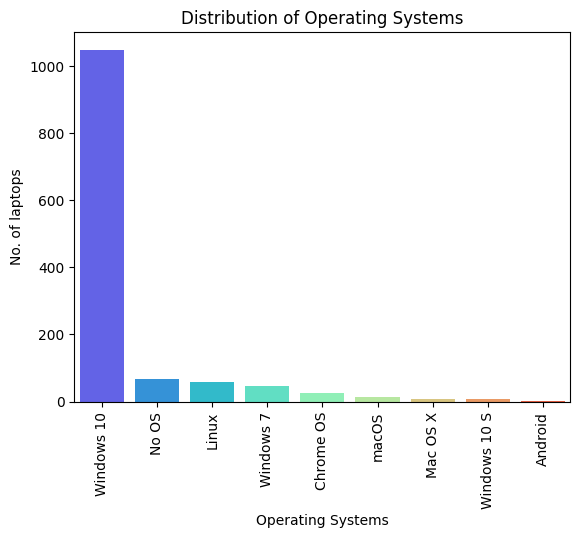

In [21]:
sns.barplot(x=df['OS'].value_counts().index,y=df['OS'].value_counts(), palette='rainbow', hue=df['OS'].value_counts().index)
plt.title("Distribution of Operating Systems")
plt.xlabel("Operating Systems")
plt.ylabel("No. of laptops")
plt.xticks(rotation = 90)
plt.show()

# MacOs are the most used operating systems

In [22]:
x = df[df['OS']=='No OS']
x['Company'].value_counts()

,count
Company,
Lenovo,47
HP,12
Asus,4
Xiaomi,3


In [23]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [24]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


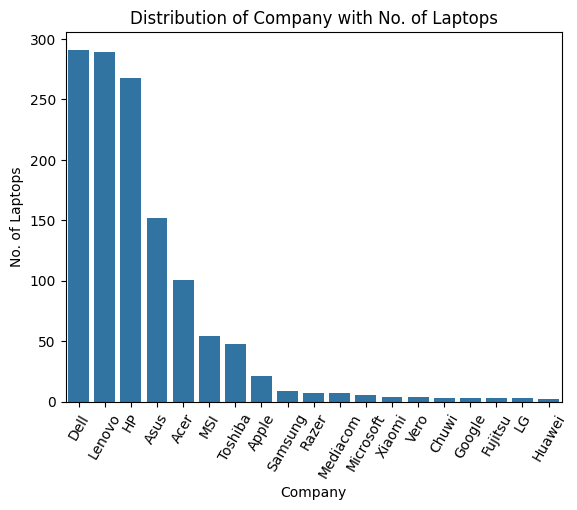

In [25]:
sns.barplot(x=df['Company'].value_counts().index,y=df['Company'].value_counts())
plt.title("Distribution of Company with No. of Laptops")
plt.ylabel("No. of Laptops")
plt.xticks(rotation=60)
plt.show()

# Dell, Lenovo and HP are leading manufacturers of laptops

In [26]:
df.TypeName.value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


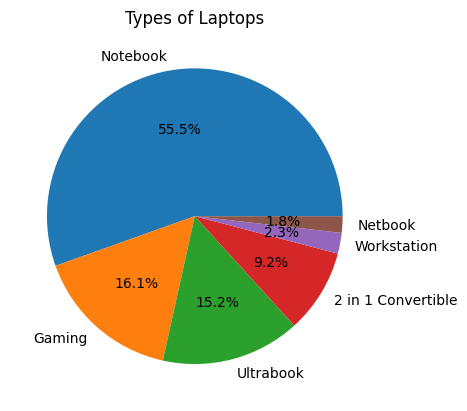

In [27]:
plt.pie(df['TypeName'].value_counts(), labels=df['TypeName'].value_counts().index,autopct="%1.1f%%")
plt.title("Types of Laptops")
plt.show()

# Notebook is the most sold laptop type.

Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64


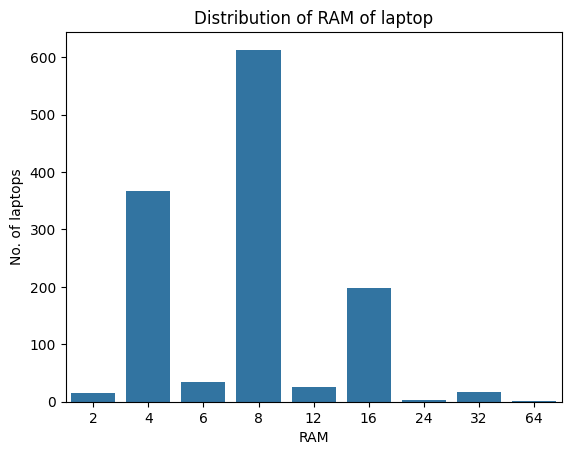

In [28]:
print(df['Ram'].value_counts())

sns.barplot(x=df['Ram'].value_counts().index,y=df['Ram'].value_counts())
plt.title("Distribution of RAM of laptop")
plt.xlabel("RAM")
plt.ylabel("No. of laptops")
plt.show()

# As seen above 8 GB RAM are most sold laptops

In [29]:
print(df['Price_euros'].describe())

count    1275.000000
mean     1134.969059
std       700.752504
min       174.000000
25%       609.000000
50%       989.000000
75%      1496.500000
max      6099.000000
Name: Price_euros, dtype: float64


# **Most and Least Expensive Laptops**

In [30]:
df[(df['Price_euros']==df['Price_euros'].min()) | (df['Price_euros']==df['Price_euros'].max())]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
196,Razer,Blade Pro,Gaming,17.3,32,Windows 10,3.49,6099.0,4K Ultra HD,3840,...,No,Intel,2.9,Core i7 7820HK,1024,0,SSD,No,Nvidia,GeForce GTX 1080
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,2,Chrome OS,1.30,174.0,Standard,1366,...,No,Intel,1.5,Celeron Dual Core 3205U,32,0,SSD,No,Intel,HD Graphics


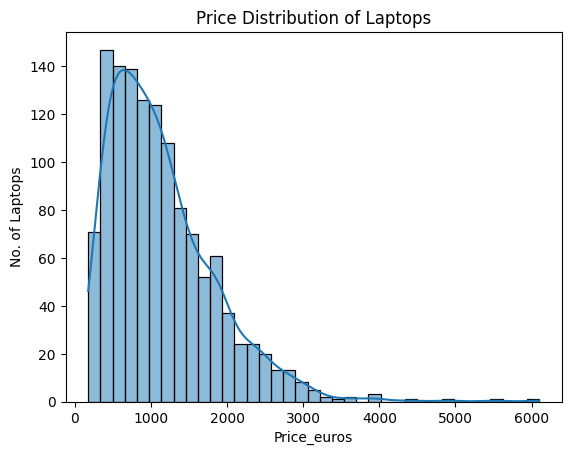

In [31]:
sns.histplot(x=df['Price_euros'], kde=True)
plt.ylabel("No. of Laptops")
plt.title("Price Distribution of Laptops")
plt.show()

# As seen above laptop around the range of 300-1100 euros are most sold.

# Let's see the laptops with Extraordinary Prices as Potential Outliers

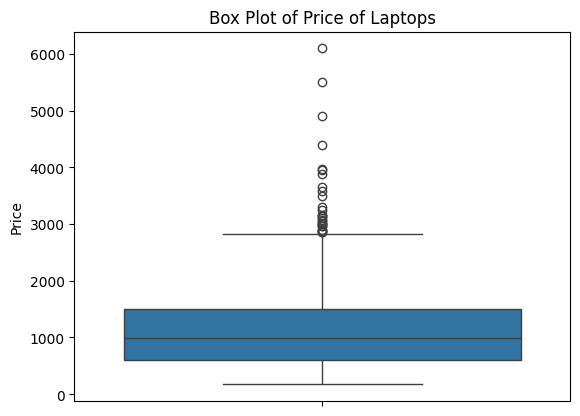

In [32]:
sns.boxplot(df.Price_euros)
plt.title("Box Plot of Price of Laptops")
plt.ylabel("Price")
plt.show()

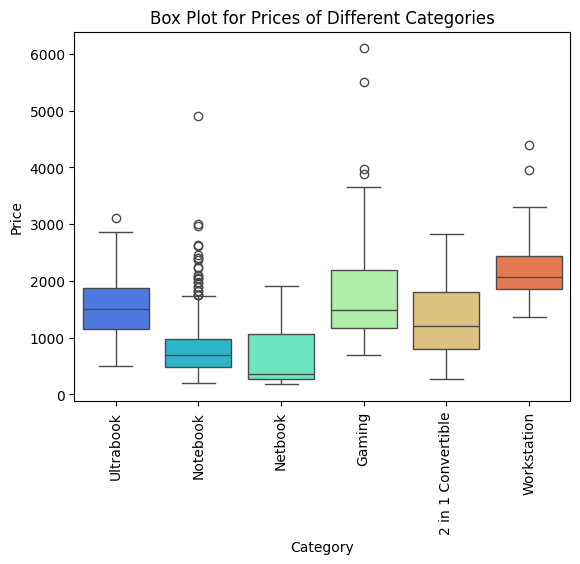

In [33]:
sns.boxplot(x=df['TypeName'],y=df['Price_euros'], palette='rainbow', hue=df['TypeName'])
plt.title("Box Plot for Prices of Different Categories")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

# From above, we can see Notebooks have more outlier prices

In [34]:
Q1 = df['Price_euros'].quantile(0.25)
Q2 = df['Price_euros'].quantile(0.50)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = df[(df['Price_euros'] > upper_bound) | (df['Price_euros'] < lower_bound)]
print("Upper Bound is : ",upper_bound,"\nLower Bound is :",lower_bound,"\n\n")
print("The Outliers Are : \n\n",outliers['Price_euros'])
print("\n\nNumber of Outliers are : ", outliers.shape[0])

Upper Bound is :  2827.75 
Lower Bound is : -722.25 


The Outliers Are : 

 17      2858.00
196     6099.00
204     3055.00
238     3890.00
247     2999.00
297     2884.86
517     2968.00
530     3012.77
563     2999.00
610     4899.00
659     3147.37
723     3659.40
744     3299.00
749     4389.00
758     2868.99
778     2899.00
780     3588.80
830     5499.00
841     3072.89
911     3100.00
955     3154.00
968     3149.00
1017    2968.00
1066    3975.00
1081    3240.00
1103    2899.00
1136    3949.40
1231    3499.00
Name: Price_euros, dtype: float64


Number of Outliers are :  28


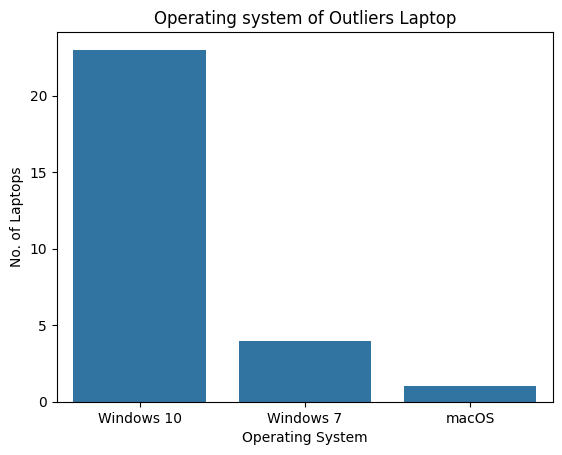

In [35]:
sns.barplot(x=outliers['OS'].value_counts().index,y=outliers['OS'].value_counts())
plt.xlabel('Operating System')
plt.ylabel('No. of Laptops')
plt.title('Operating system of Outliers Laptop')
plt.show()

# Mac OS laptops have least outlying priced laptops

# **MULTIVARIATE ANALYSIS**

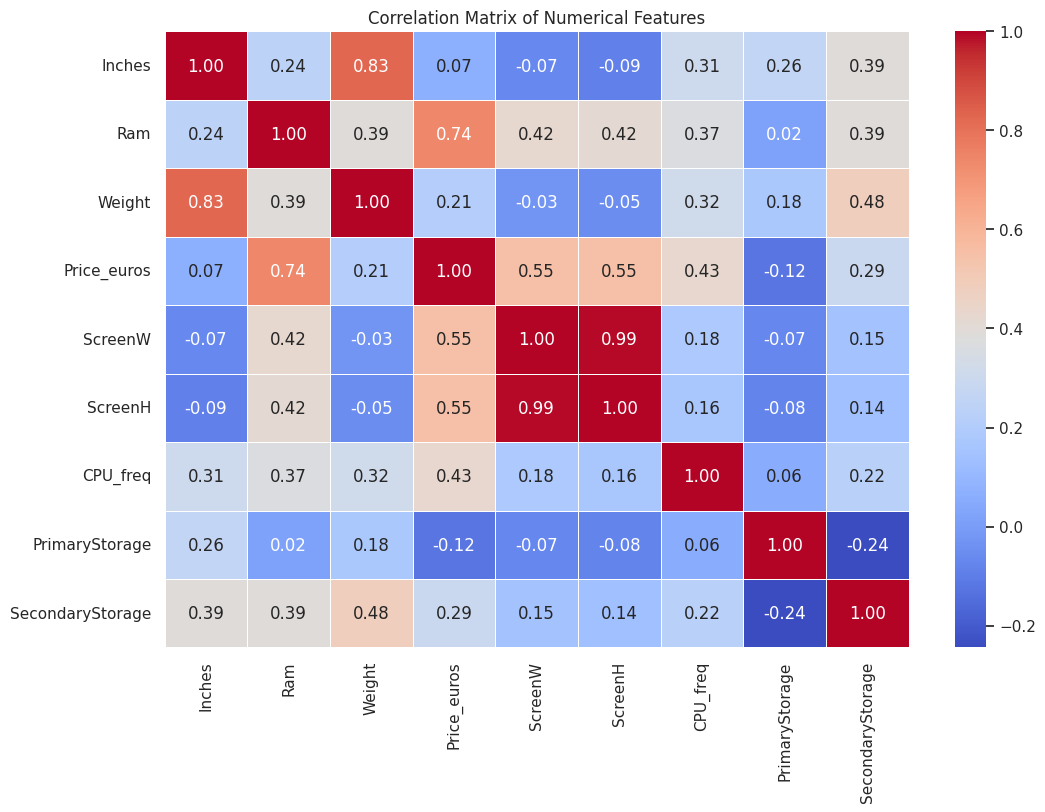

In [44]:
sns.set(style="whitegrid")

# correlation matrix for numerical features
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## **The heatmap shows strong correlations between:**

Price and RAM (0.74): More RAM leads to higher prices.

Price and Primary Storage (0.44): SSDs and larger storage contribute to cost.

Screen Resolution (ScreenW, ScreenH) and Price (~0.60): Higher resolutions increase price.

CPU Frequency and Price (0.55): Faster CPUs are in pricier models.

Weight and Screen Size (0.67): Larger screens increase weight

# Here, we are analyzing for categorical variable's impact on price

<ipython-input-47-5fb8b6ec12cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CPU_company", y="Price_euros", data=df, showfliers=False, palette="Set2")


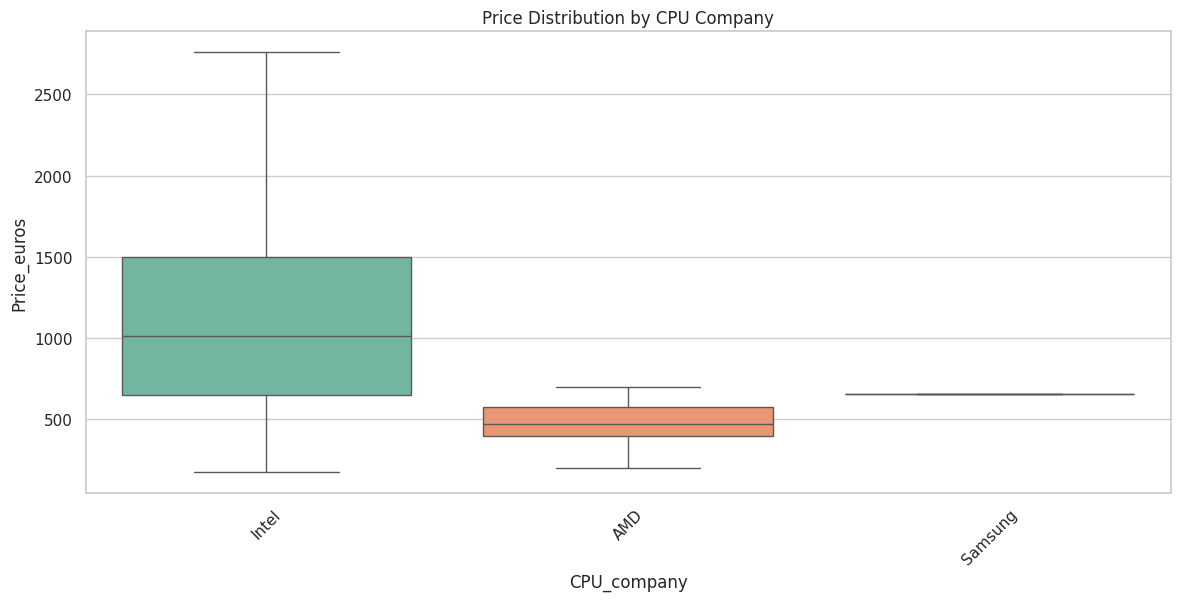

<ipython-input-47-5fb8b6ec12cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="GPU_company", y="Price_euros", data=df, showfliers=False, palette="Set3")


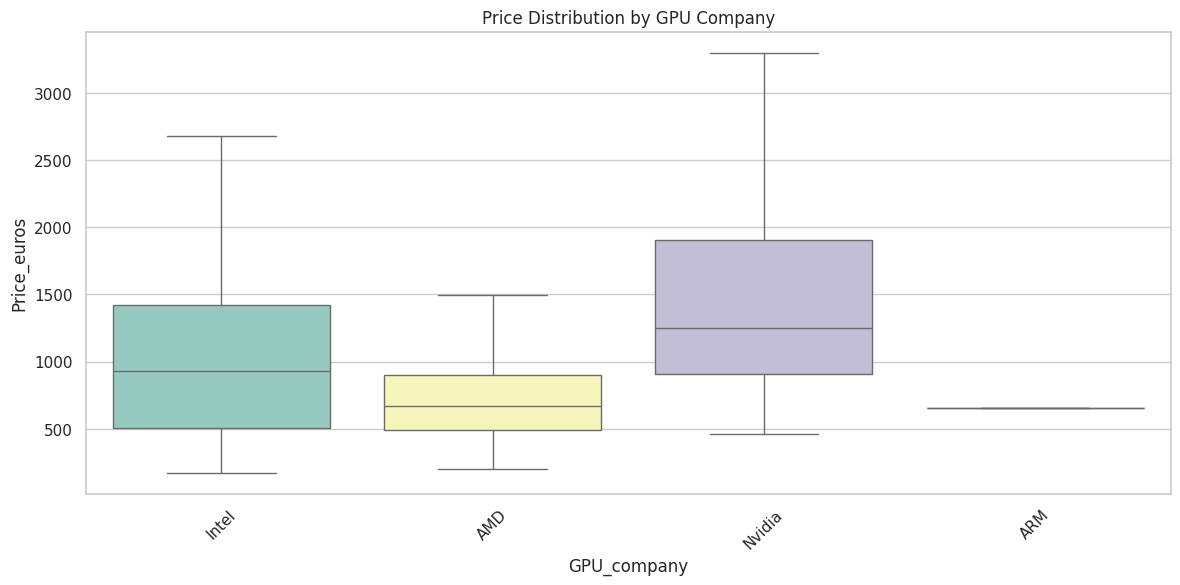

<ipython-input-47-5fb8b6ec12cf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="OS", y="Price_euros", data=df, showfliers=False, palette="Set1")


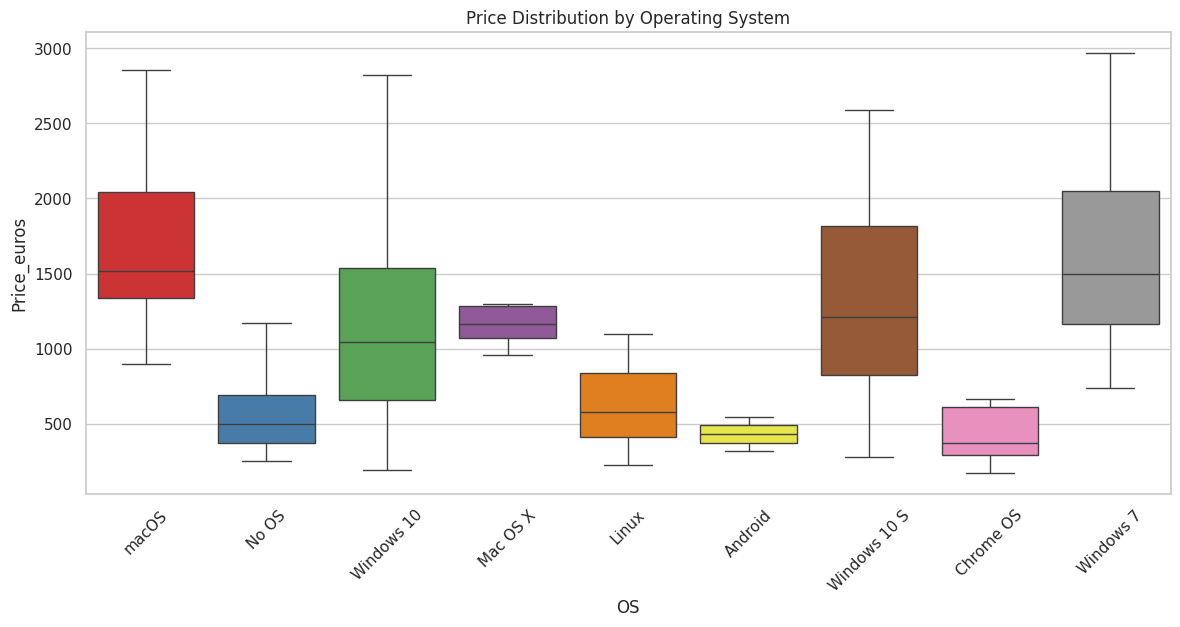

<ipython-input-47-5fb8b6ec12cf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Company", y="Price_euros", palette="viridis")


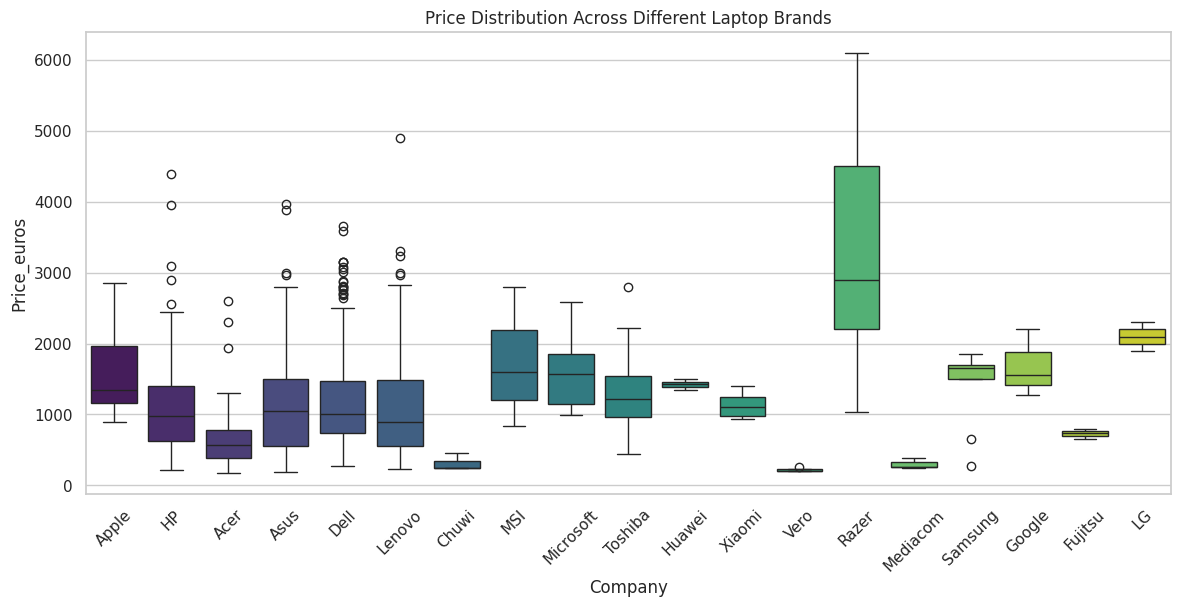

<ipython-input-47-5fb8b6ec12cf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="PrimaryStorageType", y="Price_euros", palette="magma")


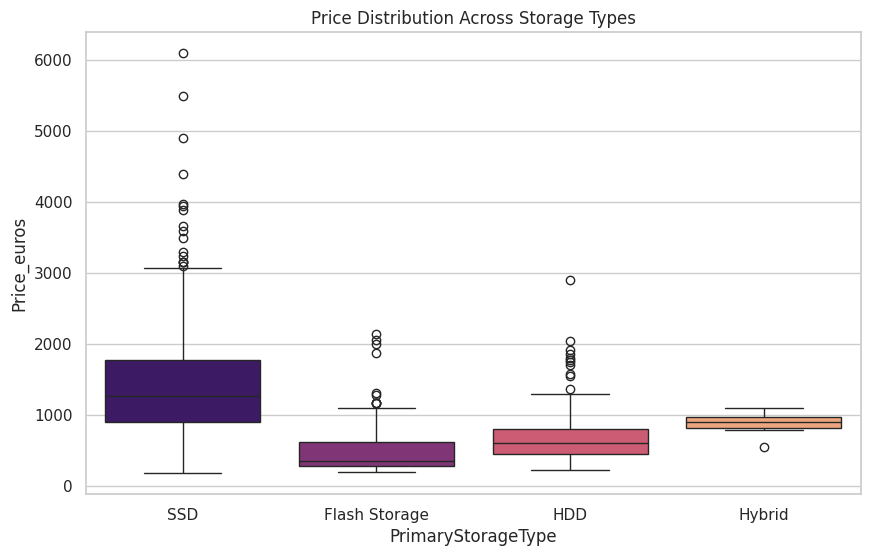

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(x="CPU_company", y="Price_euros", data=df, showfliers=False, palette="Set2")
plt.title("Price Distribution by CPU Company")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(x="GPU_company", y="Price_euros", data=df, showfliers=False, palette="Set3")
plt.title("Price Distribution by GPU Company")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x="OS", y="Price_euros", data=df, showfliers=False, palette="Set1")
plt.title("Price Distribution by Operating System")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Company", y="Price_euros", palette="viridis")
plt.xticks(rotation=45)
plt.title("Price Distribution Across Different Laptop Brands")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="PrimaryStorageType", y="Price_euros", palette="magma")
plt.title("Price Distribution Across Storage Types")
plt.show()




# **Key Insights from Categorical Analysis:**
CPU Brand: Laptops with Intel CPUs have a wide price range, while AMD and other brands are generally cheaper.

GPU Brand: NVIDIA-powered laptops tend to be the most expensive, followed by AMD, while Intel-integrated GPUs are mostly in lower-cost models.

Operating System: macOS laptops are significantly more expensive than Windows or Linux-based ones

Apple laptops have the highest median prices, followed by Microsoft and Razer, while brands like Acer and HP offer more budget-friendly options.

SSD-based laptops are significantly more expensive than HDD-based ones, reflecting the speed and efficiency advantage of SSD storage.

<ipython-input-46-2a6e28a506e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Touchscreen", y="Price_euros", palette="Set2")


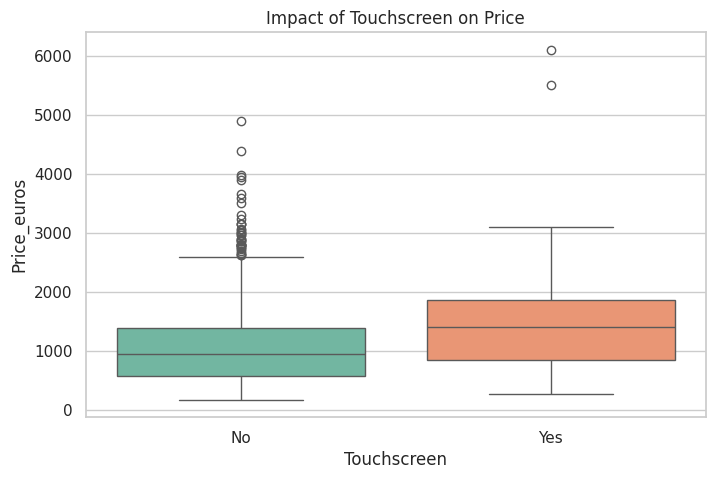

<ipython-input-46-2a6e28a506e7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RetinaDisplay", y="Price_euros", palette="coolwarm")


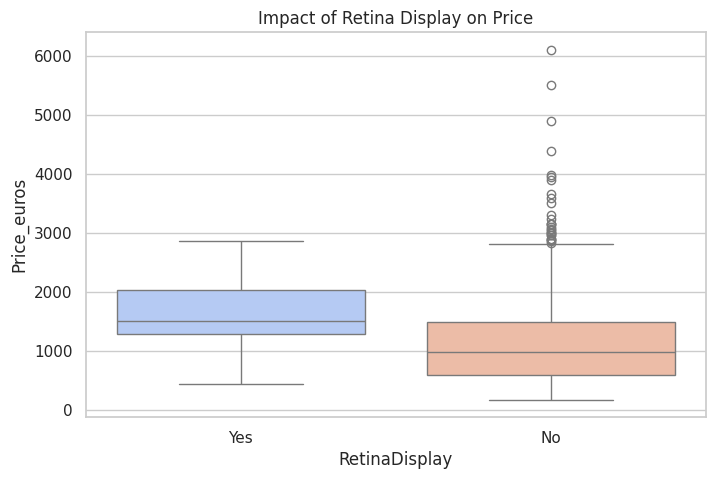

In [46]:
#Touchscreen Effect on Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Touchscreen", y="Price_euros", palette="Set2")
plt.title("Impact of Touchscreen on Price")
plt.show()

#Retina Display Effect on Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="RetinaDisplay", y="Price_euros", palette="coolwarm")
plt.title("Impact of Retina Display on Price")
plt.show()

# **Conclusions:**

Touchscreen laptops are generally more expensive, reflecting the added cost of this feature.

Laptops with Retina displays have significantly higher prices, indicating a premium segment for high-resolution screens.

# Analyzing Relationships: Screen Dimensions & Laptop Size Correlations

The correlation coefficient between Screen Width and Height is :  0.9940690344373329


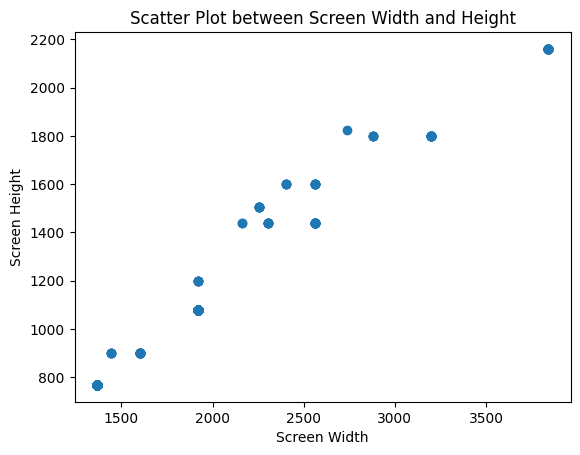

In [36]:
print("The correlation coefficient between Screen Width and Height is : ",df['ScreenW'].corr(df['ScreenH']))

plt.scatter(df['ScreenW'],df['ScreenH'])
plt.title('Scatter Plot between Screen Width and Height')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

The correlation coefficient between Inches and Weight is :  0.8266379625499097


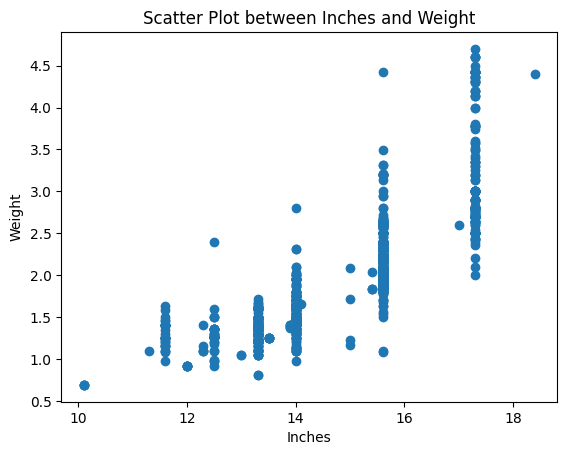

In [37]:
print("The correlation coefficient between Inches and Weight is : ",df['Inches'].corr(df['Weight']))

plt.scatter(df['Inches'],df['Weight'])
plt.title('Scatter Plot between Inches and Weight')
plt.xlabel('Inches')
plt.ylabel('Weight')
plt.show()

# Distribution of Laptop Types Across CPU Companies

In [38]:
table = pd.crosstab(df['TypeName'],df['CPU_company'])
table

CPU_company,AMD,Intel,Samsung
TypeName,,,
2 in 1 Convertible,0,116,1
Gaming,6,199,0
Netbook,0,23,0
Notebook,53,654,0
Ultrabook,1,193,0
Workstation,0,29,0


Text(50.72222222222221, 0.5, 'Typename')

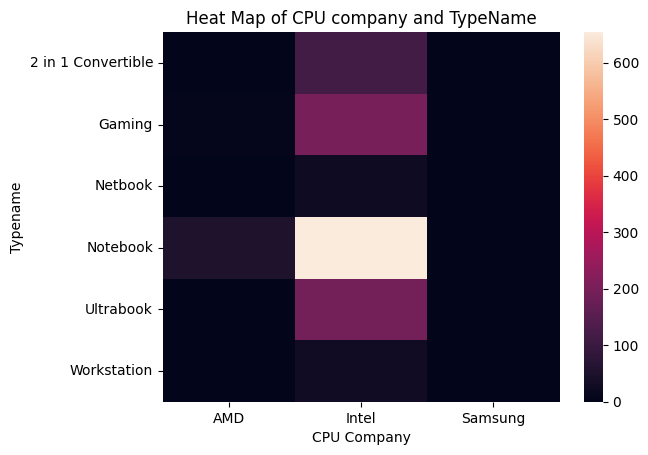

In [39]:
sns.heatmap(table)
plt.title("Heat Map of CPU company and TypeName")
plt.xlabel("CPU Company")
plt.ylabel("Typename")

# Chi square Test

In [40]:
chi2, p, dof, expected = chi2_contingency(table)
print("The value of chi2 is :",chi2)
print("The value of p is :", p)

if p < 0.05:
    print("The Distribution of Weight and TypeName is Statistically Significant")
else :
    print("The Distribution of Weight and TypeName is not Statistically Significant")

The value of chi2 is : 39.47411795836697
The value of p is : 2.0965450168795277e-05
The Distribution of Weight and TypeName is Statistically Significant


# Average Price and Weight Comparison Across Laptop Types

TypeName
2 in 1 Convertible    1289.714530
Gaming                1731.380634
Netbook                673.382609
Notebook               788.744781
Ultrabook             1556.676031
Workstation           2280.358966
Name: Price_euros, dtype: float64


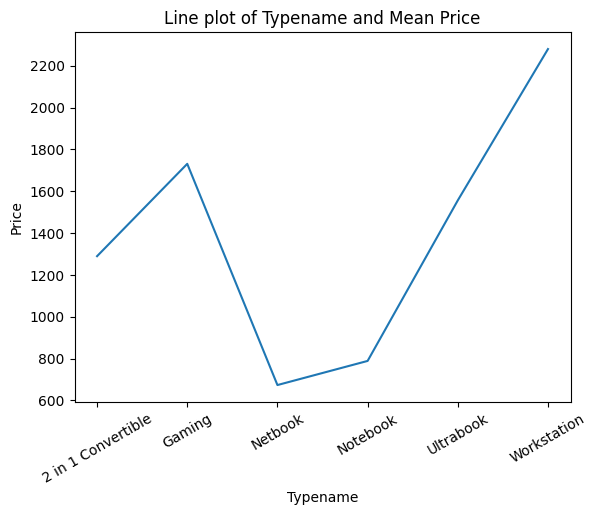

In [41]:
group = df.groupby('TypeName')['Price_euros'].mean()
print(group)

sns.lineplot(group)
plt.title('Line plot of Typename and Mean Price')
plt.xlabel('Typename')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.show()

# Generally, Netbook are least expensive and Workstation are most expensive.

TypeName
2 in 1 Convertible    1.546504
Gaming                2.949761
Netbook               1.317826
Notebook              2.055615
Ultrabook             1.344680
Workstation           2.466552
Name: Weight, dtype: float64


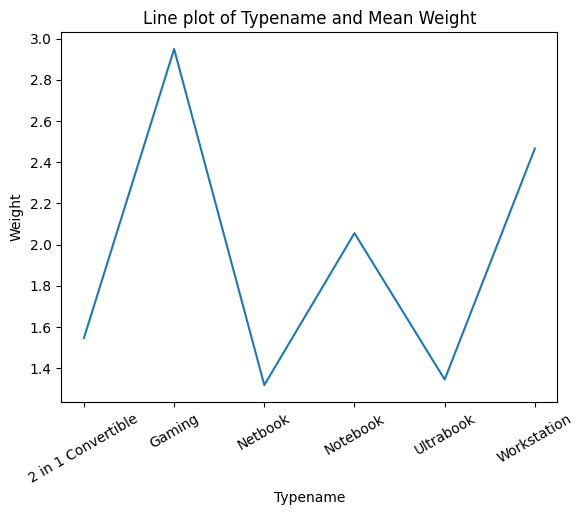

In [42]:
group = df.groupby('TypeName')['Weight'].mean()
print(group)

sns.lineplot(group)
plt.title('Line plot of Typename and Mean Weight')
plt.xlabel('Typename')
plt.ylabel('Weight')
plt.xticks(rotation=30)
plt.show()

# Generally, Gaming Laptops are more heavy while Netbooks and Ultrabooks are light

# **I have written all the conclusions in between the analysis as and when they are drawn.**